# Drawing Categories
This notebooks contains the script for drawing the Hasse diagrams used in the notes.
We use the Luxor.jl to do the drawing, together with some auxiliary functions I've implemented
in `luxorcat.jl`.

In [1]:
using Pkg
Pkg.activate(".")

  Activating project at `~/MEGA/EMAp/Mathematical-Short-Notes/Fields/Category-Theory/notebooks`


In [2]:
include("luxorcat.jl")

┌ Info: Precompiling MathTeXEngine [0a4f8689-d25c-4efe-a92b-7142dfc1aa53]
└ @ Base loading.jl:1423
┌ Warning: unknown command \Join
└ @ MathTeXEngine ~/.julia/packages/MathTeXEngine/zH12o/src/parser/commands_registration.jl:48
┌ Warning: Package Luxor does not have MathTeXEngine in its dependencies:
│ - If you have Luxor checked out for development and have
│   added MathTeXEngine as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with Luxor
│ Loading MathTeXEngine into Luxor from project dependency, future warnings for Luxor are suppressed.
└ @ nothing nothing:984


### $1$ Category

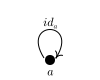

In [3]:
d = Drawing(100,80,:svg)
origin()
translate(Point(0,20))
circle(O, 5,:fill)
fontface("Arial")
fontsize(12)
label(L"a",:S, offset=10)
morphism(O, L"id_a")
finish()
savediagram(d, "1Cat.pdf");
d

### $2$ Category

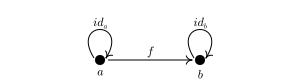

In [4]:
d = Drawing(300,80,:svg)
origin()
translate(Point(0,20))
fontsize(12)

a = Point(-50,0)
circle(a, 5,:fill)

morphism(a, L"id_a")
label(L"a",:S, a, offset=10)

b = Point(50,0)
circle(b, 5,:fill)
label(L"b",:S,b, offset=10)
morphism(b, L"id_b")

morphism(a,b)
finish()
savediagram(d, "2Cat.pdf");
d

### $2$ Category omitting identities

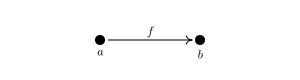

In [6]:
d = Drawing(300,80,:svg)
origin()
# translate(Point(0,10))
fontsize(12)

a = Point(-50,0)
circle(a, 5,:fill)

label(L"a",:S, a, offset=10)

b = Point(50,0)
circle(b, 5,:fill)
label(L"b",:S,b, offset=10)

morphism(a,b)
finish()
savediagram(d, "2Catsimple.pdf");
d

### $3$ Category